# Predicting the prices of diamonds using machine learning
This project tries to create and train a machine learning model to be able to predict the prices of diamonds given some features.

## 1. Problem Definintion
> Can we successfully predict the price of diamonds given some features?

## 2. Data
The dataset used for this project was gotten from Kaggle.

## 3. Evaluation
The evaluation metric for this project is an RMSLE (Root Mean Squared Log Error) of **0.2** and an R^2 (Coefficient of determinant) score of **90%.**

## 4. Features
The dataset used for this project has 6000 samples and 7 features. The features of the dataset used are as follows:
* Carat Weight
* Cut 
* Color
* Clarity
* Polish
* Symmetry
* Report


## EDA

### Importing the tools

In [117]:
# EDA tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Show plots in the notebook
%matplotlib inline

# Modelling tools
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso, Ridge, SGDRegressor
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from joblib import dump

In [78]:
df = pd.read_csv("data/diamond.csv")
df

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171
...,...,...,...,...,...,...,...,...
5995,1.03,Ideal,D,SI1,EX,EX,GIA,6250
5996,1.00,Very Good,D,SI1,VG,VG,GIA,5328
5997,1.02,Ideal,D,SI1,EX,EX,GIA,6157
5998,1.27,Signature-Ideal,G,VS1,EX,EX,GIA,11206


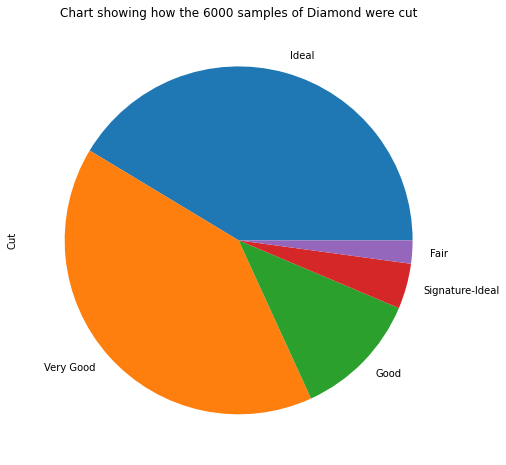

In [79]:
# Plotting how the diamonds were cut
df["Cut"].value_counts().plot(kind="pie", figsize=(10, 8), title="Chart showing how the 6000 samples of Diamond were cut");

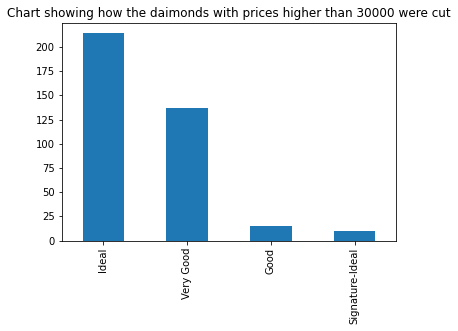

In [80]:
df[df["Price"] > 30000]["Cut"].value_counts().plot(kind="bar", title="Chart showing how the daimonds with prices higher than 30000 were cut");

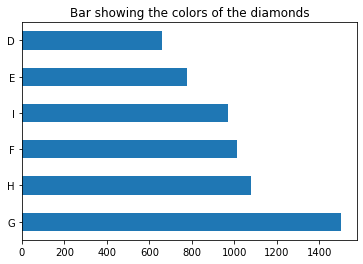

In [81]:
df["Color"].value_counts().plot(kind="barh", title="Bar showing the colors of the diamonds");

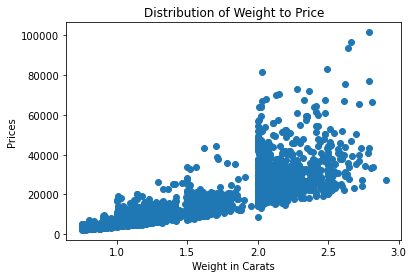

In [82]:
fig, ax = plt.subplots()
ax.scatter(df["Carat Weight"], df["Price"])
ax.set(title="Distribution of Weight to Price", xlabel="Weight in Carats", ylabel="Prices");

The Chart above shows that the Prices of the diamonds tend to increase as the weight increases

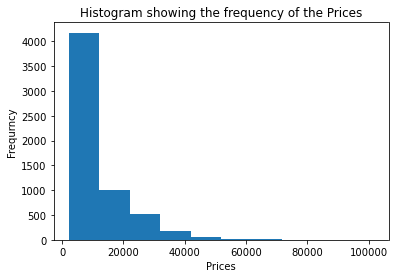

In [83]:
fig, ax = plt.subplots()
ax.hist(df["Price"])
ax.set(title="Histogram showing the frequency of the Prices", xlabel="Prices", ylabel="Frequrncy");

This shows that majority of the diamonds cost less than 10000

## Cleaning the Data

In [84]:
df.isna().sum()

Carat Weight    0
Cut             0
Color           0
Clarity         0
Polish          0
Symmetry        0
Report          0
Price           0
dtype: int64

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Carat Weight  6000 non-null   float64
 1   Cut           6000 non-null   object 
 2   Color         6000 non-null   object 
 3   Clarity       6000 non-null   object 
 4   Polish        6000 non-null   object 
 5   Symmetry      6000 non-null   object 
 6   Report        6000 non-null   object 
 7   Price         6000 non-null   int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 375.1+ KB


**5 of the columns in this dataframe have content which are objects (strings), this needs to be converted to numbers before modelling can work**

In [86]:
# Put the colmns which are objects in a list
objects = []
for key, value in df.items():
    if pd.api.types.is_object_dtype(df[key]):
        objects.append(key)

In [87]:
# Convert the object columns to numbers
dummies = pd.get_dummies(df[objects])

In [88]:
dummies

,Cut_Fair,Cut_Good,Cut_Ideal,Cut_Signature-Ideal,Cut_Very Good,Color_D,Color_E,Color_F,Color_G,Color_H,...,Polish_EX,Polish_G,Polish_ID,Polish_VG,Symmetry_EX,Symmetry_G,Symmetry_ID,Symmetry_VG,Report_AGSL,Report_GIA
0,0,0,1,0,0,0,0,0,0,1,...,0,0,0,1,1,0,0,0,0,1
1,0,0,1,0,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,1,0
2,0,0,1,0,0,0,0,0,0,1,...,1,0,0,0,1,0,0,0,0,1
3,0,0,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,1
4,0,0,1,0,0,0,0,0,1,0,...,1,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,0,0,1,0,0,1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
5996,0,0,0,0,1,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
5997,0,0,1,0,0,1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
5998,0,0,0,1,0,0,0,0,1,0,...,1,0,0,0,1,0,0,0,0,1


In [89]:
# Remove the columns which are objects from the original dataframe
df.drop(objects, axis=1, inplace=True)

In [90]:
# Add the transformed columns to the original dataframe
for label, column in dummies.items():
    df[label] = column

In [91]:
df

,Carat Weight,Price,Cut_Fair,Cut_Good,Cut_Ideal,Cut_Signature-Ideal,Cut_Very Good,Color_D,Color_E,Color_F,...,Polish_EX,Polish_G,Polish_ID,Polish_VG,Symmetry_EX,Symmetry_G,Symmetry_ID,Symmetry_VG,Report_AGSL,Report_GIA
0,1.10,5169,0,0,1,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1
1,0.83,3470,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
2,0.85,3183,0,0,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
3,0.91,4370,0,0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,1
4,0.83,3171,0,0,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,1.03,6250,0,0,1,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,1
5996,1.00,5328,0,0,0,0,1,1,0,0,...,0,0,0,1,0,0,0,1,0,1
5997,1.02,6157,0,0,1,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,1
5998,1.27,11206,0,0,0,1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1


**The dataset is now ready to be used to train a model**

## Modelling

### 5 different algorithms will be tried and the best one (the one closest to the evaluation metric) will be chosen 

In [51]:
# Split the data into features and labels
X = df.drop("Price", axis=1)
y = df["Price"]

In [53]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [68]:
# Create a function to train and test the models
def train_test(estimators, train_data, train_labels, test_data, test_labels):
    """
    Trains and test models which are passed in. Returns the R^2 and RMSLE scores of the models.
    train_data : The data to be used to train the models without labels.
    train_labels : The labels for the training data.
    test_data : The data to be used to test/score the models without labels.
    test_labels : The labels for the test data
    """
    
    # Setup a random seed
    np.random.seed(7)
    
    # Create dictionaries to hold the scores
    r2_scores = {}
    RMSLE_scores = {}
    
    # Loop through the estimators dictionary
    for key, value in estimators.items():
        
        # Train the models
        value.fit(train_data, train_labels)
        
        # Get and store the R^2 scores
        r2 = value.score(test_data, test_labels)
        r2_scores[key] = f"{r2 * 100:.2f}%"
        
#         # Get and store the RMSLE scores
#         prediction = value.predict(test_data)
#         RMSLE = np.sqrt(mean_squared_log_error(test_labels, prediction))
#         RMSLE_scores[key] = RMSLE
        
    return r2_scores, RMSLE_scores
        

In [60]:
# Instantiate the models
rf = RandomForestRegressor()
lasso = Lasso()
ridge = Ridge()
sgd = SGDRegressor()
catboost = CatBoostRegressor()
xgboost = XGBRegressor()

In [61]:
# Create a dictionary to store models
models = {
    "Random Forest Regressor": rf,
    "Lasso": lasso,
    "Ridge": ridge,
    "SGD Regressor": sgd,
    "CatBoost Regressor": catboost,
    "XGBoost Regressor": xgboost
}

In [69]:
# Train and score the models
r2_scores, RMSLE_scores = train_test(models, X_train, y_train, X_test, y_test)

Learning rate set to 0.051601
0:	learn: 9931.6037310	total: 5.56ms	remaining: 5.55s
1:	learn: 9516.0265501	total: 11ms	remaining: 5.48s
2:	learn: 9139.9645291	total: 16ms	remaining: 5.3s
3:	learn: 8790.1198149	total: 21.2ms	remaining: 5.27s
4:	learn: 8455.8008535	total: 26.3ms	remaining: 5.24s
5:	learn: 8140.0023000	total: 31.6ms	remaining: 5.24s
6:	learn: 7843.1324694	total: 36.6ms	remaining: 5.2s
7:	learn: 7570.5726590	total: 41.9ms	remaining: 5.2s
8:	learn: 7292.9968404	total: 47ms	remaining: 5.18s
9:	learn: 7032.0227570	total: 52.2ms	remaining: 5.17s
10:	learn: 6820.4888795	total: 57.2ms	remaining: 5.15s
11:	learn: 6556.1394640	total: 62.4ms	remaining: 5.13s
12:	learn: 6336.5374255	total: 67.5ms	remaining: 5.13s
13:	learn: 6120.7477510	total: 72.5ms	remaining: 5.1s
14:	learn: 5926.4626482	total: 77.9ms	remaining: 5.11s
15:	learn: 5717.5081254	total: 84.2ms	remaining: 5.18s
16:	learn: 5532.4686100	total: 89.1ms	remaining: 5.15s
17:	learn: 5365.2494651	total: 94.4ms	remaining: 5.15s


182:	learn: 1176.6685870	total: 972ms	remaining: 4.34s
183:	learn: 1175.2524038	total: 978ms	remaining: 4.34s
184:	learn: 1172.3525500	total: 984ms	remaining: 4.33s
185:	learn: 1169.2043596	total: 990ms	remaining: 4.33s
186:	learn: 1167.2637932	total: 995ms	remaining: 4.33s
187:	learn: 1164.9070844	total: 1s	remaining: 4.32s
188:	learn: 1162.6090611	total: 1s	remaining: 4.32s
189:	learn: 1160.7002850	total: 1.01s	remaining: 4.31s
190:	learn: 1157.4935983	total: 1.02s	remaining: 4.31s
191:	learn: 1155.5971226	total: 1.02s	remaining: 4.3s
192:	learn: 1154.2203344	total: 1.03s	remaining: 4.3s
193:	learn: 1151.9413548	total: 1.03s	remaining: 4.29s
194:	learn: 1149.9924903	total: 1.04s	remaining: 4.29s
195:	learn: 1148.1103894	total: 1.04s	remaining: 4.28s
196:	learn: 1145.1555139	total: 1.05s	remaining: 4.27s
197:	learn: 1142.4041422	total: 1.05s	remaining: 4.27s
198:	learn: 1139.7945158	total: 1.06s	remaining: 4.26s
199:	learn: 1137.8306101	total: 1.06s	remaining: 4.25s
200:	learn: 1136.1

334:	learn: 946.0672403	total: 1.79s	remaining: 3.56s
335:	learn: 944.9478948	total: 1.8s	remaining: 3.55s
336:	learn: 943.3296528	total: 1.8s	remaining: 3.55s
337:	learn: 942.3414756	total: 1.81s	remaining: 3.55s
338:	learn: 941.3906741	total: 1.82s	remaining: 3.54s
339:	learn: 940.0672872	total: 1.82s	remaining: 3.54s
340:	learn: 939.1239984	total: 1.83s	remaining: 3.53s
341:	learn: 938.2482791	total: 1.83s	remaining: 3.53s
342:	learn: 937.0263773	total: 1.84s	remaining: 3.52s
343:	learn: 936.2400849	total: 1.84s	remaining: 3.52s
344:	learn: 935.1070994	total: 1.85s	remaining: 3.51s
345:	learn: 934.4090117	total: 1.85s	remaining: 3.51s
346:	learn: 933.1315849	total: 1.86s	remaining: 3.5s
347:	learn: 932.3656753	total: 1.86s	remaining: 3.49s
348:	learn: 931.7304943	total: 1.87s	remaining: 3.49s
349:	learn: 930.8784027	total: 1.88s	remaining: 3.48s
350:	learn: 930.0878494	total: 1.88s	remaining: 3.48s
351:	learn: 929.2118901	total: 1.89s	remaining: 3.47s
352:	learn: 928.5251858	total: 

492:	learn: 843.9170858	total: 2.61s	remaining: 2.68s
493:	learn: 843.6078499	total: 2.61s	remaining: 2.68s
494:	learn: 843.2578330	total: 2.62s	remaining: 2.67s
495:	learn: 843.0068603	total: 2.63s	remaining: 2.67s
496:	learn: 842.5475084	total: 2.63s	remaining: 2.66s
497:	learn: 841.5172027	total: 2.64s	remaining: 2.66s
498:	learn: 841.4490205	total: 2.64s	remaining: 2.65s
499:	learn: 840.9514986	total: 2.65s	remaining: 2.65s
500:	learn: 840.7383343	total: 2.65s	remaining: 2.64s
501:	learn: 840.2194796	total: 2.66s	remaining: 2.64s
502:	learn: 840.1555625	total: 2.66s	remaining: 2.63s
503:	learn: 839.8183610	total: 2.67s	remaining: 2.63s
504:	learn: 838.9367087	total: 2.67s	remaining: 2.62s
505:	learn: 838.4550215	total: 2.68s	remaining: 2.61s
506:	learn: 837.9690088	total: 2.68s	remaining: 2.61s
507:	learn: 837.6814649	total: 2.69s	remaining: 2.6s
508:	learn: 837.3782629	total: 2.69s	remaining: 2.6s
509:	learn: 836.9067163	total: 2.7s	remaining: 2.59s
510:	learn: 836.0663260	total: 

647:	learn: 789.3704258	total: 3.41s	remaining: 1.85s
648:	learn: 788.9591267	total: 3.41s	remaining: 1.85s
649:	learn: 788.5709679	total: 3.42s	remaining: 1.84s
650:	learn: 788.2613131	total: 3.42s	remaining: 1.83s
651:	learn: 788.1705510	total: 3.43s	remaining: 1.83s
652:	learn: 787.9054096	total: 3.43s	remaining: 1.82s
653:	learn: 787.6436196	total: 3.44s	remaining: 1.82s
654:	learn: 787.2891972	total: 3.44s	remaining: 1.81s
655:	learn: 787.1488920	total: 3.45s	remaining: 1.81s
656:	learn: 786.3648524	total: 3.46s	remaining: 1.8s
657:	learn: 785.8737413	total: 3.46s	remaining: 1.8s
658:	learn: 785.5300580	total: 3.47s	remaining: 1.79s
659:	learn: 785.1822189	total: 3.47s	remaining: 1.79s
660:	learn: 784.7420732	total: 3.48s	remaining: 1.78s
661:	learn: 784.4480792	total: 3.48s	remaining: 1.78s
662:	learn: 784.0000910	total: 3.49s	remaining: 1.77s
663:	learn: 783.7408337	total: 3.49s	remaining: 1.77s
664:	learn: 783.2587339	total: 3.5s	remaining: 1.76s
665:	learn: 782.9941137	total: 

807:	learn: 743.8107811	total: 4.23s	remaining: 1s
808:	learn: 743.4087915	total: 4.24s	remaining: 1s
809:	learn: 743.2392382	total: 4.24s	remaining: 995ms
810:	learn: 742.6455683	total: 4.25s	remaining: 990ms
811:	learn: 742.2686667	total: 4.25s	remaining: 985ms
812:	learn: 742.2181087	total: 4.26s	remaining: 980ms
813:	learn: 742.0104224	total: 4.27s	remaining: 975ms
814:	learn: 741.7456555	total: 4.27s	remaining: 970ms
815:	learn: 741.4391867	total: 4.28s	remaining: 965ms
816:	learn: 741.1057881	total: 4.29s	remaining: 960ms
817:	learn: 740.9793527	total: 4.29s	remaining: 955ms
818:	learn: 740.7840450	total: 4.29s	remaining: 949ms
819:	learn: 740.5969128	total: 4.3s	remaining: 944ms
820:	learn: 740.4761237	total: 4.31s	remaining: 939ms
821:	learn: 740.2173587	total: 4.31s	remaining: 934ms
822:	learn: 739.9966521	total: 4.32s	remaining: 929ms
823:	learn: 739.6981198	total: 4.32s	remaining: 924ms
824:	learn: 739.3813248	total: 4.33s	remaining: 918ms
825:	learn: 739.2642299	total: 4.33

963:	learn: 715.0843739	total: 5.05s	remaining: 189ms
964:	learn: 714.9211802	total: 5.06s	remaining: 184ms
965:	learn: 714.6851703	total: 5.07s	remaining: 178ms
966:	learn: 714.6218008	total: 5.07s	remaining: 173ms
967:	learn: 714.4151359	total: 5.08s	remaining: 168ms
968:	learn: 714.3772914	total: 5.08s	remaining: 163ms
969:	learn: 714.1815621	total: 5.09s	remaining: 157ms
970:	learn: 713.8005234	total: 5.09s	remaining: 152ms
971:	learn: 713.7380701	total: 5.1s	remaining: 147ms
972:	learn: 713.6252590	total: 5.11s	remaining: 142ms
973:	learn: 713.4890288	total: 5.11s	remaining: 136ms
974:	learn: 713.0181682	total: 5.12s	remaining: 131ms
975:	learn: 713.0029470	total: 5.12s	remaining: 126ms
976:	learn: 712.8843985	total: 5.13s	remaining: 121ms
977:	learn: 712.8631545	total: 5.13s	remaining: 115ms
978:	learn: 712.8243158	total: 5.14s	remaining: 110ms
979:	learn: 712.7659441	total: 5.14s	remaining: 105ms
980:	learn: 712.6219485	total: 5.15s	remaining: 99.7ms
981:	learn: 712.5170793	tota

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [70]:
r2_scores

{'Random Forest Regressor': '98.66%',
 'Lasso': '86.43%',
 'Ridge': '86.73%',
 'SGD Regressor': '86.95%',
 'CatBoost Regressor': '99.01%',
 'XGBoost Regressor': '98.81%'}

In [95]:
# Make the R^2 scores dictionary a dataframe for plotting
r2_scores_df = {}
for key, value in r2_scores.items():
    value = float(value[:-1])
    r2_scores_df[key] = value

r2_scores_df = pd.DataFrame(r2_scores_df, index=["R^2 Scores"])

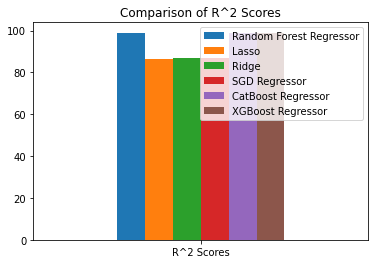

In [101]:
r2_scores_df.plot(kind="bar", title="Comparison of R^2 Scores")
plt.xticks(rotation=0);

train_test function not working for the RMSLE, we will try to do this manually

In [102]:
# Check the RMSLE of the RandomForestRegressor
y_preds = rf.predict(X_test)
np.sqrt(mean_squared_log_error(y_test, y_preds))

0.07294802242823319

In [109]:
# Check the RMSLE of the CatBoostRegressor
cat = catboost.predict(X_test)
np.sqrt(mean_squared_log_error(y_test, cat))

0.06266252732142541

In [110]:
xgb = xgboost.predict(X_test)
np.sqrt(mean_squared_log_error(y_test, xgb))

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


0.06625380834876735

In [113]:
cat[5:10], y_test[5:10]

(array([16193.31658337,  6460.13524659,  2972.82835508, 18717.27010634,
        13214.14246651]),
 1165    16630
 1629     6449
 3080     2876
 4666    16088
 4788    13261
 Name: Price, dtype: int64)

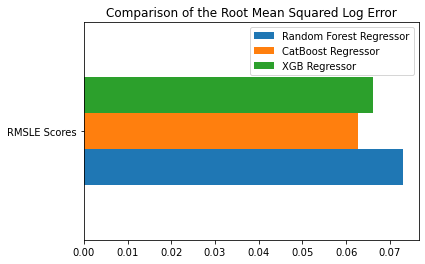

In [116]:
RMSLE_scores = {
    "Random Forest Regressor": np.sqrt(mean_squared_log_error(y_test, y_preds)),
    "CatBoost Regressor": np.sqrt(mean_squared_log_error(y_test, cat)),
    "XGB Regressor": np.sqrt(mean_squared_log_error(y_test, xgb))
}

RMSLE_scores = pd.DataFrame(RMSLE_scores, index=["RMSLE Scores"])

RMSLE_scores.plot(kind="barh", title="Comparison of the Root Mean Squared Log Error");

### We have hit the evaluation metric with the CatBoost Regressor, XGB Regressor and the RandomForestRegressor but the CatBoost Regressor is clearly the better model with the highest R^2 score and the lowest RMSLE score, so this is the model that will be saved

In [120]:
dump(catboost, "models/diamond-price-predictor.joblib");